In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
from sklearn.decomposition import PCA


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [ ]:
dataset = pd.read_csv('assets.csv')
assets = dataset['Assets']

data = yf.download(assets.to_list(), start="2019-01-01", end="2024-01-01")


print(data.head(20))
print("\n\n")
print(data.tail(20))


[*********************100%%**********************]  28 of 28 completed


Price      Adj Close                                                          \
Ticker          ACUR       AGCO       CVLT       ENSG INMD       KBWR   MITK   
Date                                                                           
2019-01-02   0.13950  47.883598  57.439999  35.161739  NaN  38.948833  11.27   
2019-01-03   0.12272  46.857647  55.779999  34.720036  NaN  39.378548  10.67   
2019-01-04   0.12030  49.616524  58.060001  35.907120  NaN  40.220776  10.86   
2019-01-07   0.12030  51.280464  58.459999  36.496063  NaN  40.478592  11.04   
2019-01-08   0.12000  51.883965  59.930000  37.535927  NaN  40.891129  10.87   
2019-01-09   0.14250  52.763359  60.500000  38.667801  NaN  41.157539  10.85   
2019-01-10   0.14250  53.409969  60.810001  37.223045  NaN  41.157539  10.87   
2019-01-11   0.17500  53.409969  61.080002  36.891766  NaN  41.234890  10.89   
2019-01-14   0.17500  53.289268  60.200001  36.965389  NaN  41.389587  10.98   
2019-01-15   0.17000  53.341000  61.0800

                                              0.0/294.9 kB ? eta -:--:--
     -----------------------------          225.3/294.9 kB 4.7 MB/s eta 0:00:01
     -------------------------------------- 294.9/294.9 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


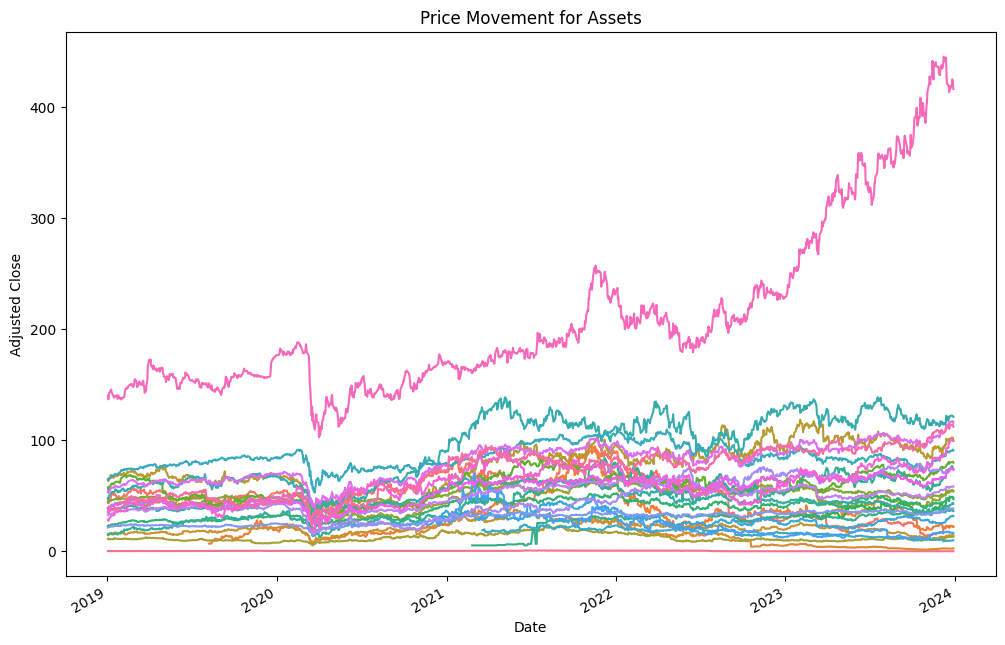

In [ ]:

plt.figure(figsize=(12, 8))

colors = sns.color_palette("husl", len(assets))

for i, asset in enumerate(assets):
    data['Adj Close'][asset].plot(color=colors[i])


plt.xlabel('Date')
plt.ylabel('Adjusted Close')
plt.title('Price Movement for Assets')


plt.show()


In [ ]:

data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)


log_returns = np.log(data / data.shift(1))


log_returns.dropna(inplace=True)



c:\Users\moumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [ ]:
stats_summary = data.describe()

mean_annual_returns = log_returns.mean() * 252

annual_volatility = log_returns.std() * np.sqrt(252)

skewness = log_returns.skew()
kurtosis = log_returns.kurtosis()

summary_stats = pd.DataFrame({
    'Mean Annual Returns': mean_annual_returns,
    'Annual Volatility': annual_volatility,
    'Skewness': skewness,
    'Kurtosis': kurtosis
})

print(summary_stats)

                  Mean Annual Returns  Annual Volatility  Skewness    Kurtosis
Price     Ticker                                                              
Adj Close ACUR              -1.859236           7.653713 -2.040424  108.663082
          AGCO               0.145374           0.414732 -0.414318    8.787781
          CVLT              -0.084137           0.382435 -2.161581   16.755901
          ENSG               0.175501           0.452998 -0.974770   17.547508
          INMD               0.338890           0.678026 -0.133218    2.689285
...                               ...                ...       ...         ...
Volume    RSPG               1.047887          12.945979  0.388133    3.039851
          SKY                0.454403           7.155675  0.437009    2.239499
          SMTC              -0.750328           7.179528  0.229289    2.841558
          STEP               0.677702           6.811955  0.395429    6.412636
          WINA               2.549519          10.63

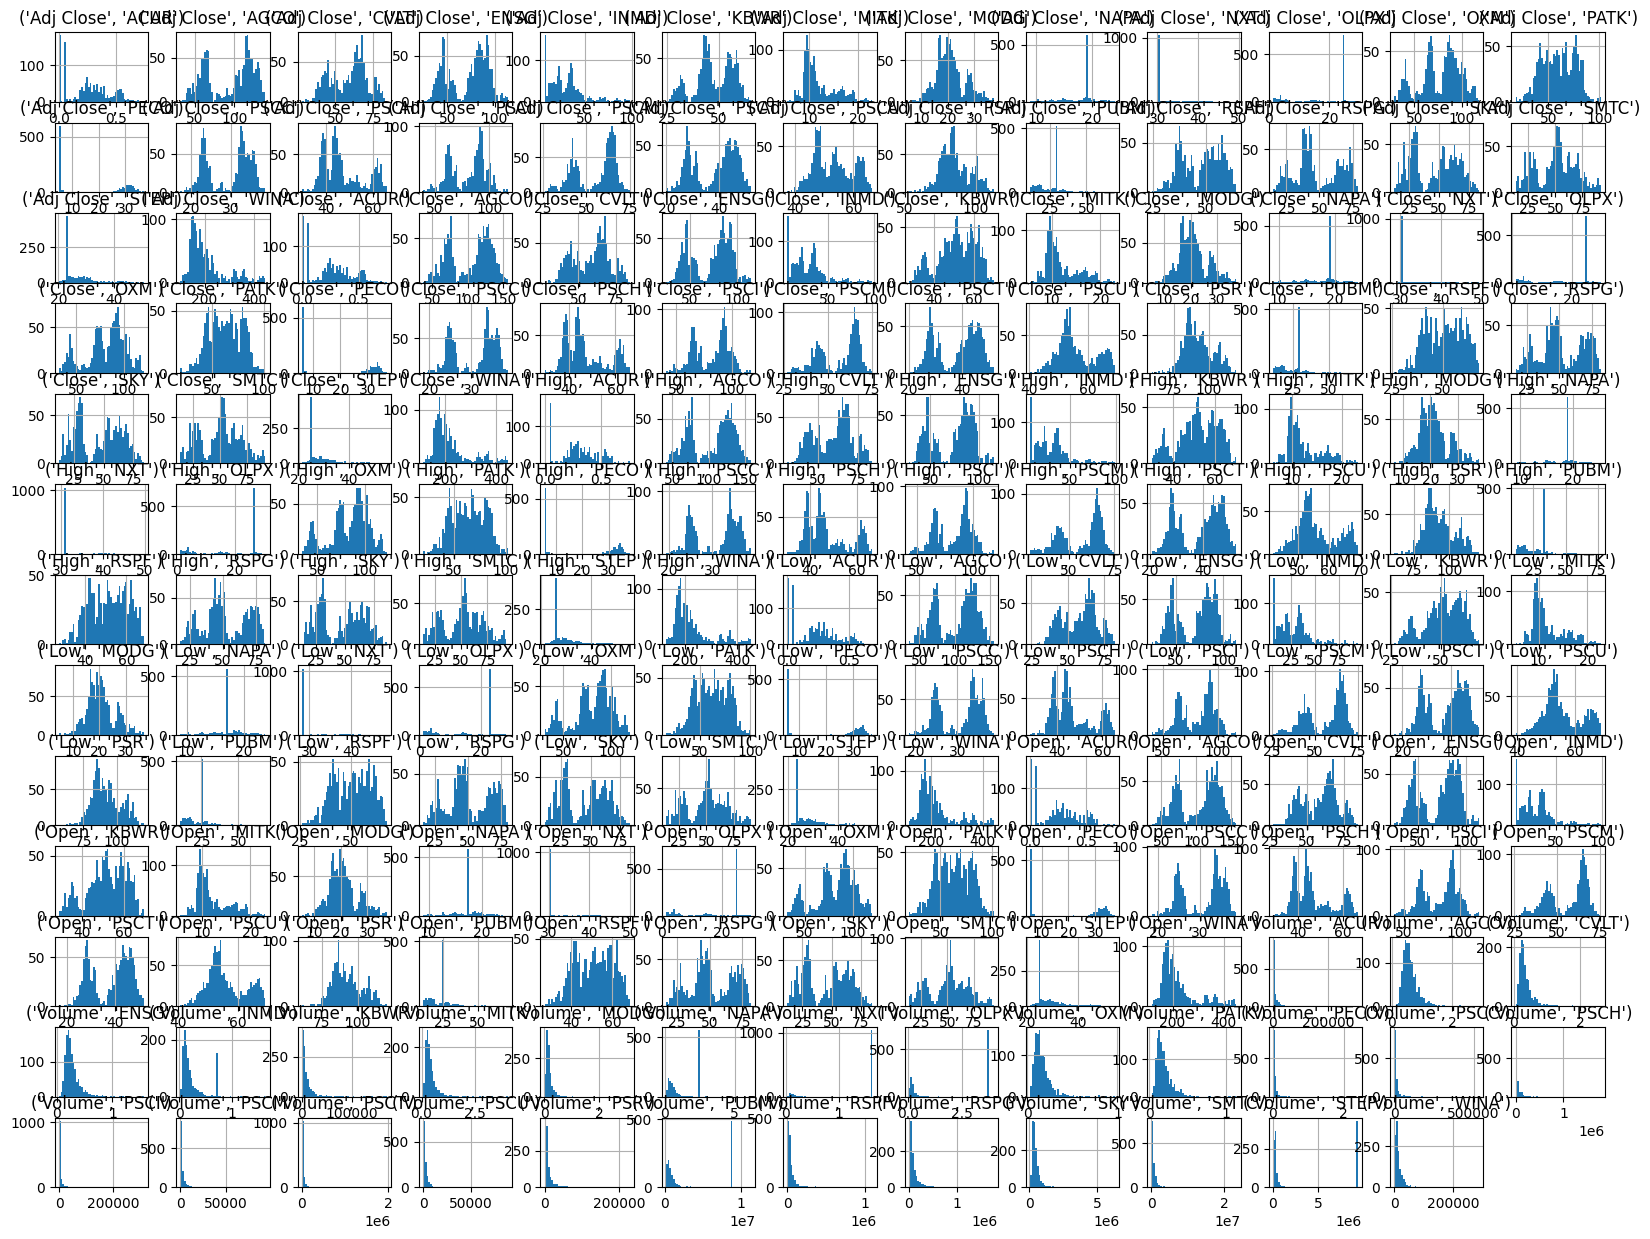

In [ ]:

data.hist(bins=50, figsize=(20,15))
plt.show()

Price            Adj Close                                                    \
Ticker                ACUR      AGCO      CVLT      ENSG      INMD      KBWR   
Price     Ticker                                                               
Adj Close ACUR    1.000000 -0.002485  0.007675  0.033037 -0.003844 -0.002605   
          AGCO   -0.002485  1.000000  0.393989  0.386485  0.331964  0.620369   
          CVLT    0.007675  0.393989  1.000000  0.335491  0.351401  0.370717   
          ENSG    0.033037  0.386485  0.335491  1.000000  0.319678  0.504727   
          INMD   -0.003844  0.331964  0.351401  0.319678  1.000000  0.338718   
...                    ...       ...       ...       ...       ...       ...   
Volume    RSPG    0.047051 -0.013524  0.032415 -0.051064 -0.053790  0.016760   
          SKY    -0.027997 -0.064072 -0.070821 -0.023476 -0.016778 -0.020466   
          SMTC   -0.015527 -0.015105 -0.042880  0.006362 -0.000199 -0.008729   
          STEP   -0.008290  0.007375  0.

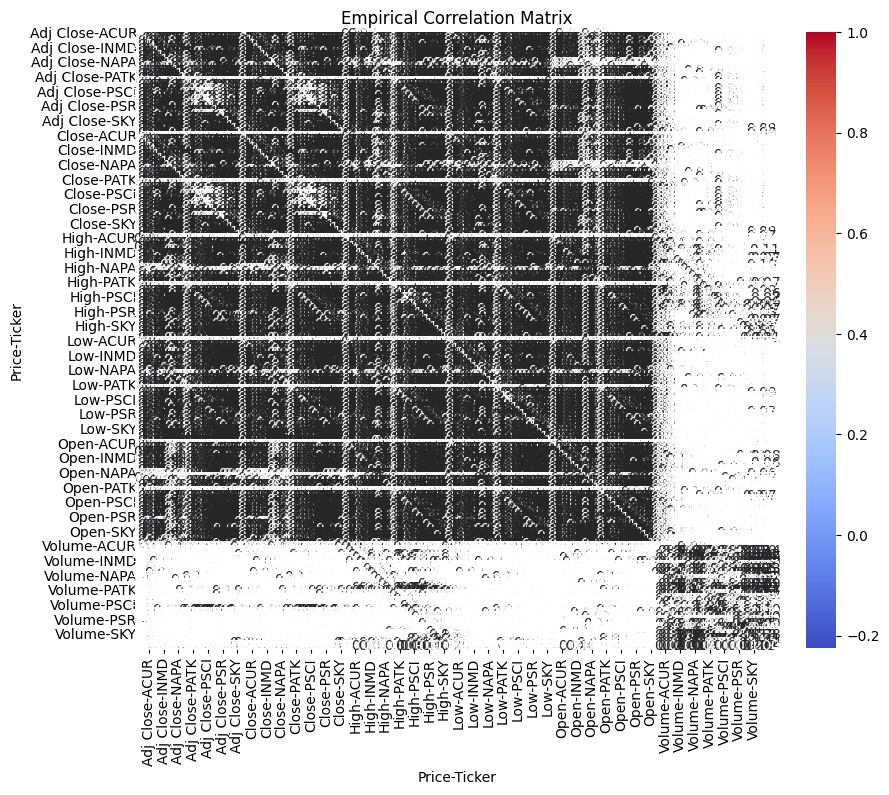

In [ ]:
correlation_matrix = log_returns.corr()

# Display the correlation matrix
print(correlation_matrix)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Empirical Correlation Matrix')
plt.show()